# formatting

In [ ]:
# Liver.weight.txt
rsid gene weight ref_allele eff_allele
rs865779 ABCA4 0.000237330916523 G A
rs1245477 ABCA4 -0.000155827586825 T C
rs34670167 ABCA4 2.90856231884e-05 G T
rs6665058 ABCA4 4.19266932445e-05 C T
rs2933916 ABCA4 -4.49095749229e-05 C A
rs2802101 ABCA4 -0.000482822533933 G A

In [ ]:
# Liver.sample.txt
n.samples
97

In [ ]:
# Liver.extra.txt
gene genename pred.perf.R2 n.snps.in.model pred.perf.pval pred.perf.qval
ABCA4 ABCA4 0.5 8 1e-10 1e-10
ABCB10 ABCB10 0.5 27 1e-10 1e-10
ABCD3 ABCD3 0.5 28 1e-10 1e-10
ABL2 ABL2 0.5 21 1e-10 1e-10
ACADM ACADM 0.5 54 1e-10 1e-10

In [ ]:
# Liver.construction.txt
chr cv.seed
10 579
11 160
12 1403
13 1528
14 1342

In [2]:
library(data.table)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:

est_file = "/gpfs/project/zhao/zy92/GTEX/output/chr1/ENSG00000000457.13/V1.ENSG00000000457.13.est"
est_df = fread(est_file)

In [4]:
dim(est_df)

[1] 5676   39

In [5]:
head(est_df)

chr,id,posg,pos,ref,alt,Adipose_Subcutaneous.adj_expr,Adipose_Visceral_Omentum.adj_expr,Adrenal_Gland.adj_expr,Artery_Aorta.adj_expr,⋯,Muscle_Skeletal.adj_expr,Ovary.adj_expr,Pituitary.adj_expr,Prostate.adj_expr,Skin_Not_Sun_Exposed_Suprapubic.adj_expr,Skin_Sun_Exposed_Lower_leg.adj_expr,Spleen.adj_expr,Stomach.adj_expr,Testis.adj_expr,Thyroid.adj_expr
<int>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,chr1_168849631_C_A_b38,0,168849631,A,C,0,-0.0004151165,-0.0004506832,0.001035186,⋯,-3.565042e-03,-0.002102308,0.003887664,0.0009957568,0,0,-0.001034856,0.000261256,0.006198619,0
1,chr1_168849726_A_T_b38,0,168849726,T,A,0,-0.0021913580,0.0000000000,0.000000000,⋯,0.000000e+00,0.000000000,0.000428974,0.0116435026,0,0,0.000000000,0.000000000,-0.066343380,0
1,chr1_168849990_C_T_b38,0,168849990,T,C,0,0.0000000000,0.0000000000,0.000000000,⋯,-6.413460e-03,0.000000000,-0.007921380,0.0000000000,0,0,0.000000000,0.000000000,-0.004635134,0
1,chr1_168850357_C_T_b38,0,168850357,T,C,0,0.0000000000,0.0030527099,0.000000000,⋯,0.000000e+00,0.000000000,0.007700619,-0.0012562958,0,0,0.000000000,0.000000000,-0.025486896,0
1,chr1_168850785_A_AG_b38,0,168850785,A,AG,0,0.0000000000,-0.0019528508,0.000000000,⋯,9.705234e-04,0.001268954,0.003094517,-0.0021228318,0,0,0.002202202,0.000000000,0.002412865,0
1,chr1_168851056_T_C_b38,0,168851056,C,T,0,0.0000000000,0.0000000000,0.000000000,⋯,-8.119035e-05,0.000000000,0.000860071,0.0092580425,0,0,0.000000000,0.002319554,0.009510299,0


In [4]:
#ref_df = fread("/ysm-gpfs/pi/zhao-data/zy92/GTEx_V8/GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_Analysis_Freeze.lookup_table.txt")

In [1]:
ref_df = data.table::fread("/ysm-gpfs/pi/zhao-data/zy92/GTEx_V8/chr1_snp.txt")

In [3]:
head(ref_df)

variant_id,chr,variant_pos,ref,alt,num_alt_per_site,rs_id_dbSNP151_GRCh38p7,variant_id_b37
<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>
chr1_13526_C_T_b38,chr1,13526,C,T,1,rs1209314672,1_13526_C_T_b37
chr1_13550_G_A_b38,chr1,13550,G,A,1,rs554008981,1_13550_G_A_b37
chr1_14451_CTCT_C_b38,chr1,14451,CTCT,C,1,.,1_14451_CTCT_C_b37
chr1_14469_C_T_b38,chr1,14469,C,T,1,rs1365462007,1_14469_C_T_b37
chr1_14470_G_A_b38,chr1,14470,G,A,1,rs1385614989,1_14470_G_A_b37
chr1_14488_T_TC_b38,chr1,14488,T,TC,1,rs1237868104,1_14488_T_TC_b37


In [5]:
library(dplyr)
set_df <- head(ref_df)
subset_df <- set_df %>%
    filter(variant_pos != 13526 )

In [6]:
subset_df

variant_id,chr,variant_pos,ref,alt,num_alt_per_site,rs_id_dbSNP151_GRCh38p7,variant_id_b37
<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>
chr1_13550_G_A_b38,chr1,13550,G,A,1,rs554008981,1_13550_G_A_b37
chr1_14451_CTCT_C_b38,chr1,14451,CTCT,C,1,.,1_14451_CTCT_C_b37
chr1_14469_C_T_b38,chr1,14469,C,T,1,rs1365462007,1_14469_C_T_b37
chr1_14470_G_A_b38,chr1,14470,G,A,1,rs1385614989,1_14470_G_A_b37
chr1_14488_T_TC_b38,chr1,14488,T,TC,1,rs1237868104,1_14488_T_TC_b37


In [ ]:
joint_df = est_df %>%
    inner_join(ref_df, by = c("id" = "variant_id"))

In [ ]:
dim(est_df)

In [ ]:
dim(joint_df)

In [ ]:
head(joint_df)

In [ ]:
head(est_df)

In [ ]:
d

In [ ]:
est

In [17]:
zero_summary = apply(est_df[,7:ncol(est_df)], 1, function(x) sum(x == 0))

In [18]:
length(zero_summary)

[1] 5676

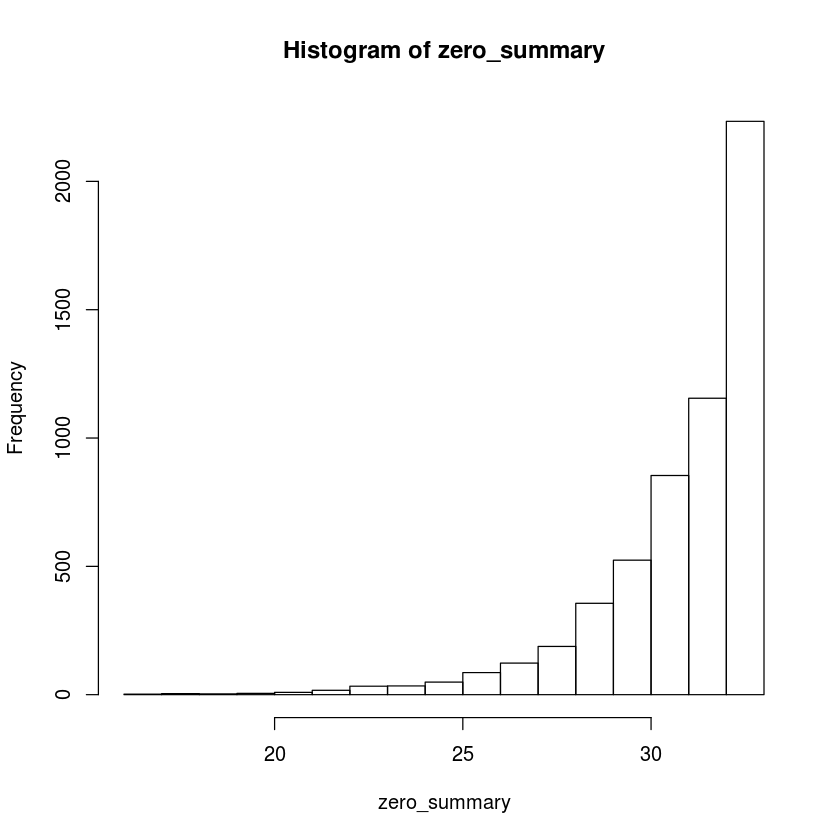

In [19]:
hist(zero_summary)

In [20]:
max(zero_summary)

[1] 33

In [21]:
for (i in 1:22) {
    chr
}

[1] 1e+08

In [23]:
chr = 1
est_file_list = list.dirs(paste0("/gpfs/project/zhao/zy92/GTEX/output/chr", chr))



In [27]:
chr = 1
est_file_list_chr = list.files(paste0("/gpfs/project/zhao/zy92/GTEX/output/chr", chr))

In [28]:
head(est_file_list_chr)

[1] "ENSG00000000457.13" "ENSG00000000460.16" "ENSG00000000938.12"
[4] "ENSG00000000971.15" "ENSG00000001460.17" "ENSG00000001461.16"

In [26]:
length(est_file_list)
head(est_file_list)

[1] 2565

[1] "/gpfs/project/zhao/zy92/GTEX/output/chr1"                   
[2] "/gpfs/project/zhao/zy92/GTEX/output/chr1/ENSG00000000457.13"
[3] "/gpfs/project/zhao/zy92/GTEX/output/chr1/ENSG00000000460.16"
[4] "/gpfs/project/zhao/zy92/GTEX/output/chr1/ENSG00000000938.12"
[5] "/gpfs/project/zhao/zy92/GTEX/output/chr1/ENSG00000000971.15"
[6] "/gpfs/project/zhao/zy92/GTEX/output/chr1/ENSG00000001460.17"

In [11]:
data.frame(rsid = joint_df$rs_id_dbSNP151_GRCh38p7,
                                                 gene = gene,
                                                 weight = joint_df[, tissue_idx],
                                                 ref_allele = joint_df$ref.x,
                                                 eff_allele = joint_df$alt.x
                                     )

rsid,gene,weight,ref_allele,eff_allele
<fct>,<fct>,<int>,<fct>,<fct>
rs11804833,ENSG00000000460.16,1,T,C
rs58536824,ENSG00000000460.16,1,A,C
rs75185274,ENSG00000000460.16,1,G,A
rs35371130,ENSG00000000460.16,1,G,T
rs17502733,ENSG00000000460.16,1,T,C
rs147258969,ENSG00000000460.16,1,T,G
rs17561899,ENSG00000000460.16,1,C,T
rs71632375,ENSG00000000460.16,1,T,C
rs56168358,ENSG00000000460.16,1,T,G


In [ ]:
library(data.table)
library(dplyr)

chr = 1
ref_df = as.data.frame(fread(paste0("/ysm-gpfs/pi/zhao-data/zy92/GTEx_V8/chr", chr, "_snp.txt")))

est_file_list = list.files(paste0("/gpfs/project/zhao/zy92/GTEX/output/chr", chr))
output_dir = paste0("/gpfs/project/zhao/zy92/GTEX/weight/chr", chr)
if (!dir.exists(output_dir)) {
    dir.create(output_dir)
}
   
weight_list = list()
weight_snps = list()
gene_vec = c()

for (i in 1:length(est_file_list)) {
    # read est
    if (i %% 20 == 0) {
        IRdisplay::display_html(paste0("INFO: gene ", i))
    }
    gene = est_file_list[i]
    est_dir = paste0("/gpfs/project/zhao/zy92/GTEX/output/chr", chr, "/", est_file_list[i])
    est_file = list.files(est_dir, pattern = "*.est")
    if (length(est_file) > 0) {   
        est_file = paste0(est_dir, "/", est_file)
        est_df = as.data.frame(fread(est_file))
        joint_df = est_df %>%
            inner_join(ref_df, by = c("id" = "variant_id"))
        tissue_vec = colnames(est_df)[7:ncol(est_df)]
        tissue_vec = as.character(sapply(tissue_vec, function(x) unlist(strsplit(x, "\\."))[1]))
                                  
        # write est 

        for (tissue_idx in 1:length(tissue_vec)) {
            tissue = tissue_vec[tissue_idx]
            #IRdisplay::display_html(tissue)
            # weight table
            if (!tissue %in% names(weight_list)) {
                weight_list[[tissue]] = data.frame(rsid = joint_df$rs_id_dbSNP151_GRCh38p7,
                                                 gene = gene,
                                                 weight = joint_df[, tissue_idx + 6],
                                                 ref_allele = joint_df$ref.x,
                                                 eff_allele = joint_df$alt.x
                                                )
                
            } else {
                tmp_df  = data.frame(rsid = joint_df$rs_id_dbSNP151_GRCh38p7,
                                                 gene = gene,
                                                 weight = joint_df[, tissue_idx + 6],
                                                 ref_allele = joint_df$ref.x,
                                                 eff_allele = joint_df$alt.x
                                     )
                weight_list[[tissue]] = rbind(weight_list[[tissue]], tmp_df)
            }
            
            # extra table
            if (!tissue %in% names(weight_snps)) {
                weight_snps[[tissue]] = data.frame(gene = gene,
                                                 genename = gene,
                                                 pred.perf.R2 = 0.5,
                                                 n.snps.in.model = nrow(joint_df),
                                                 pred.perf.pval = 1e-10,
                                                 pred.perf.qval = 1e-10
                                                )
                
            } else {
                tmp_df  = data.frame(gene = gene,
                                                 genename = gene,
                                                 pred.perf.R2 = 0.5,
                                                 n.snps.in.model = nrow(joint_df),
                                                 pred.perf.pval = 1e-10,
                                                 pred.perf.qval = 1e-10
                                                )
                                     
                weight_snps[[tissue]] = rbind(weight_snps[[tissue]], tmp_df)
            }
            
        }
        
    }
                   
                   
}


for (tissue in names(weight_list)) {
    weight_file = paste0(output_dir, "/", tissue, ".weight.txt")
    extra_file = paste0(output_dir, "/", tissue, ".extra.txt")
    write.table(weight_list[[tissue]], file = weight_file, quote = F, row.names = F)
    write.table(weight_list[[tissue]], file = extra_file, quote = F, row.names = F)


}


INFO: gene 20

INFO: gene 40

INFO: gene 60

INFO: gene 80

INFO: gene 100

INFO: gene 120

INFO: gene 140

INFO: gene 160

INFO: gene 180

INFO: gene 200

In [3]:
est_file = list.files("/gpfs/project/zhao/zy92/GTEX/output/chr1/ENSG00000065243.19/")

In [5]:
length(est_file)

[1] 0

In [5]:
library(data.table)
library(dplyr)

chr = 1
ref_df = fread(paste0("/ysm-gpfs/pi/zhao-data/zy92/GTEx_V8/chr", chr, "_snp.txt"))
est_file_list = list.files(paste0("/gpfs/project/zhao/zy92/GTEX/output/chr", chr))
output_dir = paste0("/gpfs/project/zhao/zy92/GTEX/weight/chr", chr)

if (!dir.exists(output_dir)) {
    dir.create(output_dir)
}
   
weight_list = list()
weight_snps = list()
gene_vec = c()

i = 1
gene = est_file_list[i]
est_dir = paste0("/gpfs/project/zhao/zy92/GTEX/output/chr", chr, "/", est_file_list[i])
est_file = list.files(est_dir, pattern = "*.est")
est_file = paste0(est_dir, "/", est_file)

In [18]:
tmp_df  = data.frame(rsid = joint_df$rs_id_dbSNP151_GRCh38p7,
                                                 gene = gene,
                                                 weight = joint_df[, tissue_idx + 6],
                                                 ref_allele = joint_df$ref.x,
                                                 eff_allele = joint_df$alt.x
                                     )

In [19]:
head(tmp_df)

,rsid,gene,weight,ref_allele,eff_allele
,<fct>,<fct>,<dbl>,<fct>,<fct>
1,rs11804833,ENSG00000000460.16,0,T,C
2,rs58536824,ENSG00000000460.16,0,A,C
3,rs75185274,ENSG00000000460.16,0,G,A
4,rs35371130,ENSG00000000460.16,0,G,T
5,rs17502733,ENSG00000000460.16,0,T,C
6,rs147258969,ENSG00000000460.16,0,T,G


In [3]:
df <- fread(est_file)

ERROR: Error in fread(est_file): File '/gpfs/project/zhao/zy92/GTEX/output/chr1/ENSG00000000457.13/V1.*.est' does not exist or is non-readable. getwd()=='/gpfs/loomis/project/zhao/zy92/utmost_update/utmost_update/code/R'


In [38]:
weight_list = list()
names(weight_list)
weight_list["oh"] = 1

NULL

In [39]:
names(weight_list)

[1] "oh"

In [ ]:
rsid gene weight ref_allele eff_allele
rs865779 ABCA4 0.000237330916523 G A
rs1245477 ABCA4 -0.000155827586825 T C
rs34670167 ABCA4 2.90856231884e-05 G T
rs6665058 ABCA4 4.19266932445e-05 C T
rs2933916 ABCA4 -4.49095749229e-05 C A
rs2802101 ABCA4 -0.000482822533933 G A

In [ ]:
# Liver.extra.txt
gene genename pred.perf.R2 n.snps.in.model pred.perf.pval pred.perf.qval
ABCA4 ABCA4 0.5 8 1e-10 1e-10
ABCB10 ABCB10 0.5 27 1e-10 1e-10
ABCD3 ABCD3 0.5 28 1e-10 1e-10
ABL2 ABL2 0.5 21 1e-10 1e-10
ACADM ACADM 0.5 54 1e-10 1e-10

In [35]:
tissue_vec = colnames(est_df)[7:ncol(est_df)]
tissue_vec = as.character(sapply(tissue_vec, function(x) unlist(strsplit(x, "\\."))[1]))

[1] "Adipose_Subcutaneous"                 
 [2] "Adipose_Visceral_Omentum"             
 [3] "Adrenal_Gland"                        
 [4] "Artery_Aorta"                         
 [5] "Artery_Coronary"                      
 [6] "Artery_Tibial"                        
 [7] "Brain_Anterior_cingulate_cortex_BA24" 
 [8] "Brain_Caudate_basal_ganglia"          
 [9] "Brain_Cortex"                         
[10] "Brain_Hippocampus"                    
[11] "Brain_Hypothalamus"                   
[12] "Brain_Nucleus_accumbens_basal_ganglia"
[13] "Brain_Putamen_basal_ganglia"          
[14] "Breast_Mammary_Tissue"                
[15] "Cells_EBV-transformed_lymphocytes"    
[16] "Colon_Sigmoid"                        
[17] "Esophagus_Gastroesophageal_Junction"  
[18] "Esophagus_Mucosa"                     
[19] "Esophagus_Muscularis"                 
[20] "Heart_Atrial_Appendage"               
[21] "Heart_Left_Ventricle"                 
[22] "Kidney_Cortex"                        
[23] "Lung"                                 
[24] "Muscle_Skeletal"                      
[25] "Ovary"                                
[26] "Pituitary"                            
[27] "Prostate"                             
[28] "Skin_Not_Sun_Exposed_Suprapubic"      
[29] "Skin_Sun_Exposed_Lower_leg"           
[30] "Spleen"                               
[31] "Stomach"                              
[32] "Testis"                               
[33] "Thyroid"